# **Ayudantía 4 - Visualización de Datos I**
## Data Visualization
**Ayudante:** Gabriel Burgos  
**Fecha:** Abril 2025  
 _Universidad de Concepción_

---
Este workshop se enfoca en la exploración y análisis de los rankings de tenistas ATP y WTA usando técnicas de visualización de datos y pandas en Python.

## __📝 Conceptos Relevantes__

Trabajaremos con el ___Workshop 3___ de _Data Visualization_. Los conceptos previos necesarios serán:
1. Lectura con Pandas.
2. Conceptos de Unión de Dataframes.

Además, como conceptos nuevos se utilizarán:
1. Función `cut` de pandas.
2. Gráficos básicos en python.

In [ ]:
# pip install matplotlib seaborn

# 💻 __Workshop 3__

### Clasificación de Rankings ATP y WTA
- **Hombres**: [https://www.espn.cl/tenis/rankings](https://www.espn.cl/tenis/rankings)
- **Mujeres**: [https://www.espn.cl/tenis/rankings/_/tipo/wta](https://www.espn.cl/tenis/rankings/_/tipo/wta)

Dichos rankings se actualizan semanalmente. Al momento de consultar las URLs, los rankings obtenidos corresponden a los de la semana actual.

### Actividades

In [4]:
import pandas as pd

1. Usa la función `read_html` en pandas para leer los datos directamente de las tablas presentes en la página web.

In [5]:
# Tu código aquí

In [6]:
# pip install lxml

In [7]:
# Solución
import pandas as pd

# Lectura
url_atp = 'https://www.espn.cl/tenis/rankings'
df_atp = pd.read_html(url_atp)
# Chequeo
print(df_atp, type(df_atp), len(df_atp)) # Es una lista!
df_atp = df_atp[0] # retiramos el dataframe
df_atp.head()

[     POS Unnamed: 1                 NOMBRE  PUNTOS  EDAD
0      1          -          Jannik Sinner    9930    23
1      2          1       Alexander Zverev    8085    28
2      3          1         Carlos Alcaraz    8050    21
3      4          -           Taylor Fritz    5115    27
4      5          -         Novak Djokovic    4120    37
..   ...        ...                    ...     ...   ...
145  146          7     Shintaro Mochizuki     390    21
146  147          3  Pierre-Hugues Herbert     389    34
147  148          3       Martin Landaluce     388    19
148  149          5          Vilius Gaubas     387    20
149  150          9       Mitchell Krueger     384    31

[150 rows x 5 columns]] <class 'list'> 1


,POS,Unnamed: 1,NOMBRE,PUNTOS,EDAD
0,1,-,Jannik Sinner,9930,23
1,2,1,Alexander Zverev,8085,28
2,3,1,Carlos Alcaraz,8050,21
3,4,-,Taylor Fritz,5115,27
4,5,-,Novak Djokovic,4120,37


In [8]:
# Solución
url_wta = 'https://www.espn.cl/tenis/rankings/_/tipo/wta'
df_wta = pd.read_html(url_wta)[0] # proceso reducido
df_wta.head()

,POS,Unnamed: 1,NOMBRE,PUNTOS,EDAD
0,1,-,Aryna Sabalenka,10768,26
1,2,-,Iga Swiatek,7383,23
2,3,-,Jessica Pegula,6208,31
3,4,-,Coco Gauff,6073,21
4,5,-,Madison Keys,4999,30


2. Concatena ambos dataframes.

In [9]:
# Tu código aquí

In [10]:
# Solucion
df_concat = pd.concat([df_atp, df_wta])
df_concat

,POS,Unnamed: 1,NOMBRE,PUNTOS,EDAD
0,1,-,Jannik Sinner,9930,23
1,2,1,Alexander Zverev,8085,28
2,3,1,Carlos Alcaraz,8050,21
3,4,-,Taylor Fritz,5115,27
4,5,-,Novak Djokovic,4120,37
...,...,...,...,...,...
145,146,1,Sara Bejlek,506,19
146,147,8,Daria Snigur,502,23
147,148,1,Gao Xinyu,501,27
148,149,12,Simona Waltert,500,24


3. Generalice la lectura de datos y obtenga registros de 2007 a la fecha.

In [22]:
# Tu código aquí

In [23]:
# Solución
años = (2025-2007)+1 # Cantidad de años
temps = [2007+i for i in range(años)] # lista con los años
print(temps)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [24]:
# Solución
# VISUALIZACIÓN DE AÑOS (solo aporte visual, no se requiere)
print('-----|'+'-'*53+'|'+'-'*62+'|')
print('AÑO  |   ATP'+' '*47+'| WTA'+' '*58+'|')
print('-----|'+'-'*53+'|'+'-'*62+'|')
for year in temps:
    url_atp_year = url_atp + f'/_/temporada/{year}'
    url_wta_year = url_wta + f'/temporada/{year}'
    print(f'{year} | {url_atp_year} | {url_wta_year} |')
print('-----|'+'-'*53+'|'+'-'*62+'|')

-----|-----------------------------------------------------|--------------------------------------------------------------|
AÑO  |   ATP                                               | WTA                                                          |
-----|-----------------------------------------------------|--------------------------------------------------------------|
2007 | https://www.espn.cl/tenis/rankings/_/temporada/2007 | https://www.espn.cl/tenis/rankings/_/tipo/wta/temporada/2007 |
2008 | https://www.espn.cl/tenis/rankings/_/temporada/2008 | https://www.espn.cl/tenis/rankings/_/tipo/wta/temporada/2008 |
2009 | https://www.espn.cl/tenis/rankings/_/temporada/2009 | https://www.espn.cl/tenis/rankings/_/tipo/wta/temporada/2009 |
2010 | https://www.espn.cl/tenis/rankings/_/temporada/2010 | https://www.espn.cl/tenis/rankings/_/tipo/wta/temporada/2010 |
2011 | https://www.espn.cl/tenis/rankings/_/temporada/2011 | https://www.espn.cl/tenis/rankings/_/tipo/wta/temporada/2011 |
2012 | h

In [26]:
# Solución
##### SUPER EXTRA: Para calculo de tiempo ################
import time
class Timer:
	def __init__(self):
		self.initial_time = time.time()
		self.checkpoint = self.initial_time
	
	def get_time(self):
		now = time.time()
		elapsed = time.time() - self.checkpoint
		self.checkpoint = now
		return elapsed
	
	def get_whole_time(self):
		return time.time() - self.initial_time
########################################################


# EXTRACCIÓN DE AÑOS
# La notación ME refiere a mensajes extras de mi parte.

# Contenedor vacío
dfs = []

## ME ##
print('Comenzando Lectura:'.upper())
timer = Timer()
########

# Inicio de exploración por año
for year in temps:
	print('> Año:',year) # ME
	# ATP
	print('   - Leyendo ATP:', end='') # ME
	url_atp_year = url_atp + f'/_/temporada/{year}'
	df_atp_year = pd.read_html(url_atp_year)[0]
	print(f'{timer.get_time():.2}s') # ME
	# WTA
	print('   - Leyendo WTA:', end='') # ME
	url_wta_year = url_wta + f'/temporada/{year}'
	df_wta_year = pd.read_html(url_wta_year)[0]
	print(f'{timer.get_time():.2}s') # ME
	# Distinción por año
	df_atp_year['Temporada'] = year
	df_wta_year['Temporada'] = year
	# Distinción por categoría/género 
	df_atp_year['Categoría'] = 'ATP'
	df_wta_year['Categoría'] = 'WTA'
	# Al contenedor
	dfs.append(df_atp_year)
	dfs.append(df_wta_year)
	
# Concatenación de la lista
df = pd.concat(dfs)

print(f'FIN: Tiempo total {timer.get_whole_time()}s') # ME


COMENZANDO LECTURA:
> Año: 2007
   - Leyendo ATP:1.7s
   - Leyendo WTA:1.4s
> Año: 2008
   - Leyendo ATP:1.3s
   - Leyendo WTA:1.9s
> Año: 2009
   - Leyendo ATP:0.79s
   - Leyendo WTA:1.1s
> Año: 2010
   - Leyendo ATP:1.1s
   - Leyendo WTA:0.93s
> Año: 2011
   - Leyendo ATP:0.79s
   - Leyendo WTA:0.62s
> Año: 2012
   - Leyendo ATP:0.79s
   - Leyendo WTA:1.2s
> Año: 2013
   - Leyendo ATP:1.6s
   - Leyendo WTA:0.97s
> Año: 2014
   - Leyendo ATP:1.6s
   - Leyendo WTA:0.76s
> Año: 2015
   - Leyendo ATP:0.83s
   - Leyendo WTA:1.7s
> Año: 2016
   - Leyendo ATP:0.81s
   - Leyendo WTA:1.6s
> Año: 2017
   - Leyendo ATP:0.64s
   - Leyendo WTA:1.9s
> Año: 2018
   - Leyendo ATP:0.73s
   - Leyendo WTA:1.3s
> Año: 2019
   - Leyendo ATP:1.2s
   - Leyendo WTA:0.6s
> Año: 2020
   - Leyendo ATP:2.4s
   - Leyendo WTA:1.2s
> Año: 2021
   - Leyendo ATP:0.71s
   - Leyendo WTA:1.6s
> Año: 2022
   - Leyendo ATP:1.6s
   - Leyendo WTA:2.0s
> Año: 2023
   - Leyendo ATP:0.99s
   - Leyendo WTA:1.0s
> Año: 2024
   

In [27]:
# Solución
df

,POS,NOMBRE,PUNTOS,Temporada,Categoría,Unnamed: 1,EDAD
0,1,Roger Federer,7180,2007,ATP,NaN,NaN
1,2,Rafael Nadal,5735,2007,ATP,NaN,NaN
2,3,Novak Djokovic,4470,2007,ATP,NaN,NaN
3,4,Nikolay Davydenko,2825,2007,ATP,NaN,NaN
4,5,David Ferrer,2750,2007,ATP,NaN,NaN
...,...,...,...,...,...,...,...
145,146,Sara Bejlek,506,2025,WTA,1,19.0
146,147,Daria Snigur,502,2025,WTA,8,23.0
147,148,Gao Xinyu,501,2025,WTA,1,27.0
148,149,Simona Waltert,500,2025,WTA,12,24.0


In [ ]:
# Solución
# Guardando resultados
df.to_csv('data\\ws3\\ws3.csv', index=False) # Cambien por el nombre y directorio que les acomode
print('Exportado exitosamente!')

4. A partir de la columna “edad”, cree una nueva columna llamada “rango de edad”, que sea de la forma (16-20, 21-25, …). Para ello, use la función `cut`.

In [ ]:
# Tu código aquí

In [30]:
# Solución
df = pd.read_csv('data//ws3//ws3.csv') # Lectura
df['EDAD'].describe()

count    300.00000
mean      26.20000
std        4.38529
min       17.00000
25%       23.00000
50%       26.00000
75%       29.00000
max       38.00000
Name: EDAD, dtype: float64

In [ ]:
# Solución
edades = [15,20,25,30,35,40]
# edades = list(range(15,41,5)) # Enfoque opcional
rangos = ['16-20','21-25','26-30','31-35','36-40']

df['Rango de Edad'] = pd.cut(df['EDAD'], bins=edades, labels=rangos)

In [ ]:
# Solución
df.dropna().sample(5)

,POS,NOMBRE,PUNTOS,Temporada,Categoría,Unnamed: 1,EDAD,Rango de Edad
4210,25,Karen Khachanov,1960,2025,ATP,2,28.0,26-30
4239,54,Zhang Zhizhen,995,2025,ATP,2,28.0,26-30
4481,146,Sara Bejlek,506,2025,WTA,1,19.0,16-20
4329,144,Nicolas Moreno De Alboran,398,2025,ATP,3,27.0,26-30
4461,126,Wang Xiyu,588,2025,WTA,1,24.0,21-25


5. Grafique la distribución de puntos ATP según rango de edad en 2025. ¿Es la misma distribución con respecto a 2019?

In [ ]:
# Tu código aquí

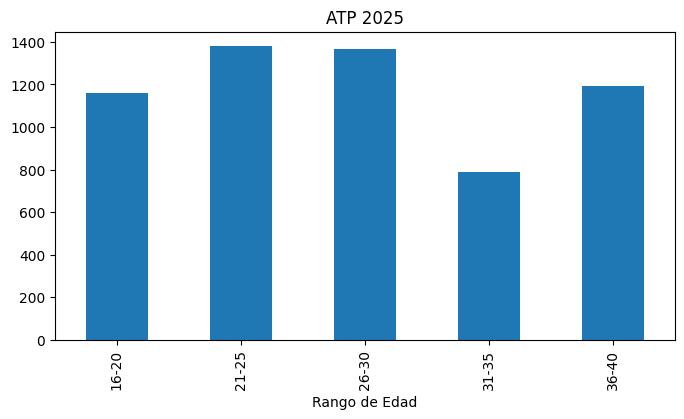

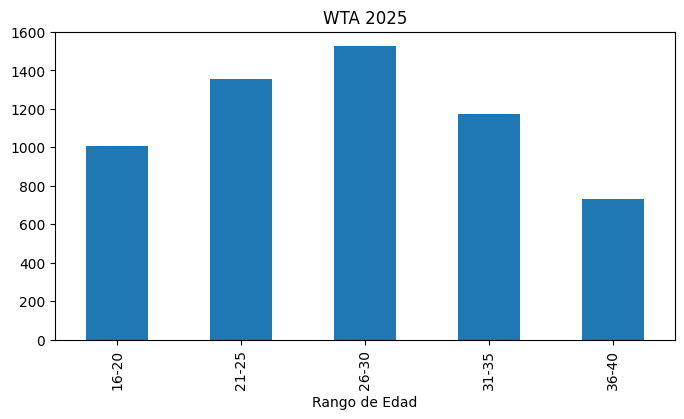

In [116]:
# Solución
import matplotlib.pyplot as plt

# Filtros
df_2025 = df[df['Temporada'] == 2025]

# Cambio de pregunta de investigación
df_atp_2025 = df[df['Categoría'] == 'ATP']
df_wta_2025 = df[df['Categoría'] == 'WTA']

# Gráficos
df_atp_2025.groupby('Rango de Edad', observed = True)['PUNTOS'].mean().plot(kind='bar', title='ATP 2025', figsize=(8,4))
plt.show()
df_wta_2025.groupby('Rango de Edad', observed = True)['PUNTOS'].mean().plot(kind='bar', title='WTA 2025', figsize=(8,4))
plt.show()

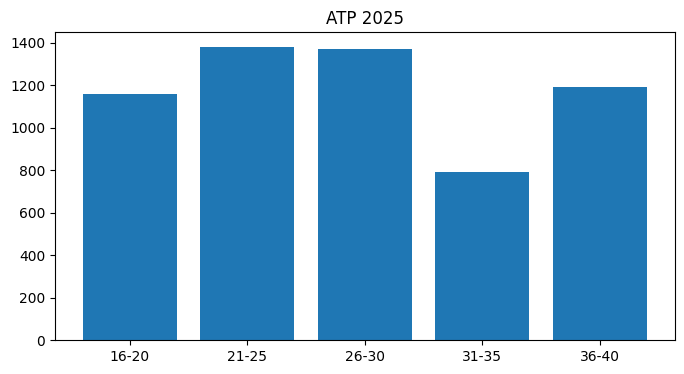

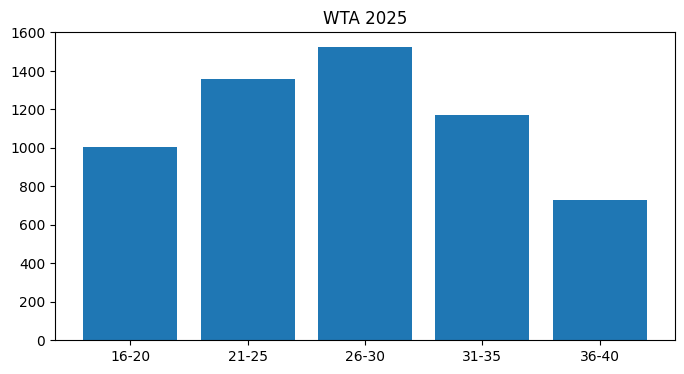

In [115]:
# Solución
# - alternativa con matplotlib
plt.figure(figsize=(8,4))
plt.title('ATP 2025')
rangos_atp_2025 = df_atp_2025.groupby('Rango de Edad', observed = True)['PUNTOS'].mean()
plt.bar(x=rangos_atp_2025.index, height=rangos_atp_2025)
plt.show()

plt.figure(figsize=(8,4))
plt.title('WTA 2025')
rangos_wta_2025 = df_wta_2025.groupby('Rango de Edad', observed = True)['PUNTOS'].mean()
plt.bar(x=rangos_wta_2025.index, height=rangos_wta_2025)
plt.show()

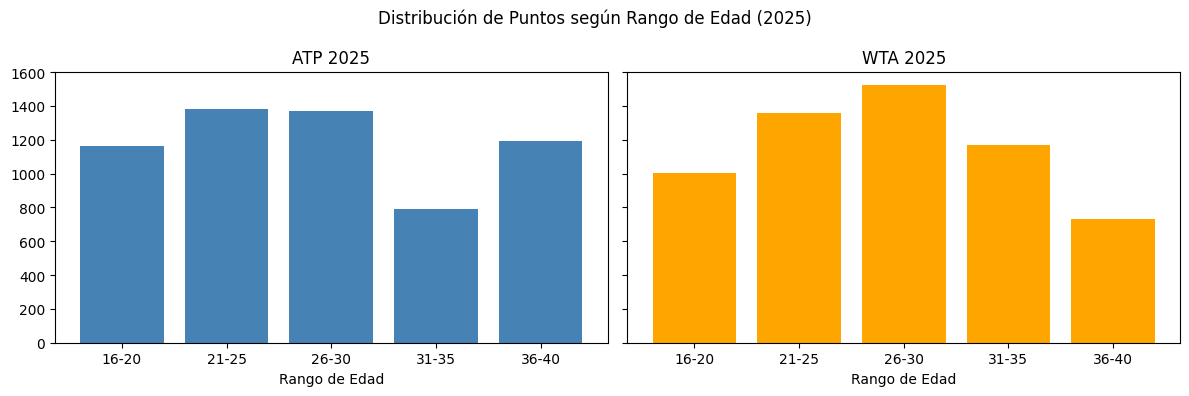

In [117]:
# Solución
# Subplots

# Crear figura con dos subgráficos horizontales
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Gráfico ATP
axes[0].bar(rangos_atp_2025.index.astype(str), rangos_atp_2025.values, color='steelblue')
axes[0].set_title('ATP 2025')
axes[0].set_xlabel('Rango de Edad')

# Gráfico WTA
axes[1].bar(rangos_wta_2025.index.astype(str), rangos_wta_2025.values, color='orange')
axes[1].set_title('WTA 2025')
axes[1].set_xlabel('Rango de Edad')

# Ajustes finales
fig.suptitle('Distribución de Puntos según Rango de Edad (2025)')
plt.tight_layout()
plt.show()

6. Grafique la distribución de puntos según sexo.

In [ ]:
# Tu código aquí

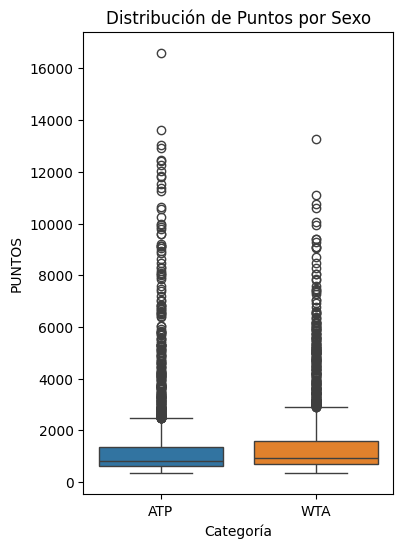

In [166]:
# Solución
import seaborn as sns

plt.figure(figsize=(4,6))
plt.title('Distribución de Puntos por Sexo')
sns.boxplot(data=df, x='Categoría', y='PUNTOS', hue='Categoría', fill=True)
# plt.xlabel('Sexo')

plt.show()

7. Grafique la distribución de edades según sexo.

In [ ]:
# Tu código aquí

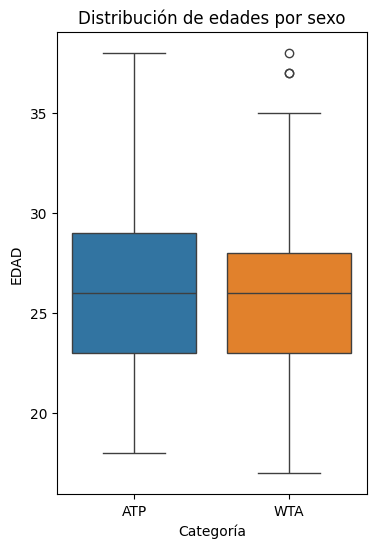

In [144]:
# Solución
plt.figure(figsize=(4,6))
plt.title('Distribución de edades por sexo')
sns.boxplot(data=df, x='Categoría', y='EDAD', hue='Categoría')
plt.show()

8. Grafique las y los 5 tenistas con mayor variación en el ranking ATP y WTA, tanto en el mismo gráfico como por separado entre 2025 y 2024.

In [ ]:
# Tu código aquí

In [153]:
df

,POS,NOMBRE,PUNTOS,Temporada,Categoría,Unnamed: 1,EDAD,Rango de Edad
0,1,Roger Federer,7180,2007,ATP,NaN,NaN,NaN
1,2,Rafael Nadal,5735,2007,ATP,NaN,NaN,NaN
2,3,Novak Djokovic,4470,2007,ATP,NaN,NaN,NaN
3,4,Nikolay Davydenko,2825,2007,ATP,NaN,NaN,NaN
4,5,David Ferrer,2750,2007,ATP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4481,146,Sara Bejlek,506,2025,WTA,1,19.0,16-20
4482,147,Daria Snigur,502,2025,WTA,8,23.0,21-25
4483,148,Gao Xinyu,501,2025,WTA,1,27.0,26-30
4484,149,Simona Waltert,500,2025,WTA,12,24.0,21-25


<Figure size 800x400 with 0 Axes>

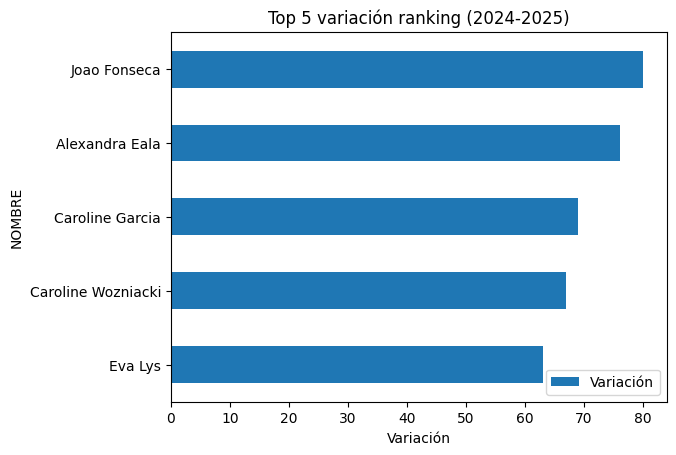

In [255]:
# Solución
# Obteniendo variación

# Filtro
df_dif = df[df['Temporada'].isin([2024, 2025])]
# Pivoteo: Años en columnas
df_dif = df_dif.pivot(index=['NOMBRE','Categoría'], columns='Temporada', values='POS').reset_index()
# Variación
df_dif['Variación'] = df_dif[2024] - df_dif[2025]
# Top
df_dif['Variación'] = df_dif['Variación'].abs()
top_variaciones = df_dif.nlargest(5, columns=['Variación'])


# Gráfico
plt.figure(figsize=(8,4))
top_variaciones[::-1].plot(kind='barh',x='NOMBRE', y='Variación', title='Top 5 variación ranking (2024-2025)')
plt.xlabel('Variación')
plt.show()

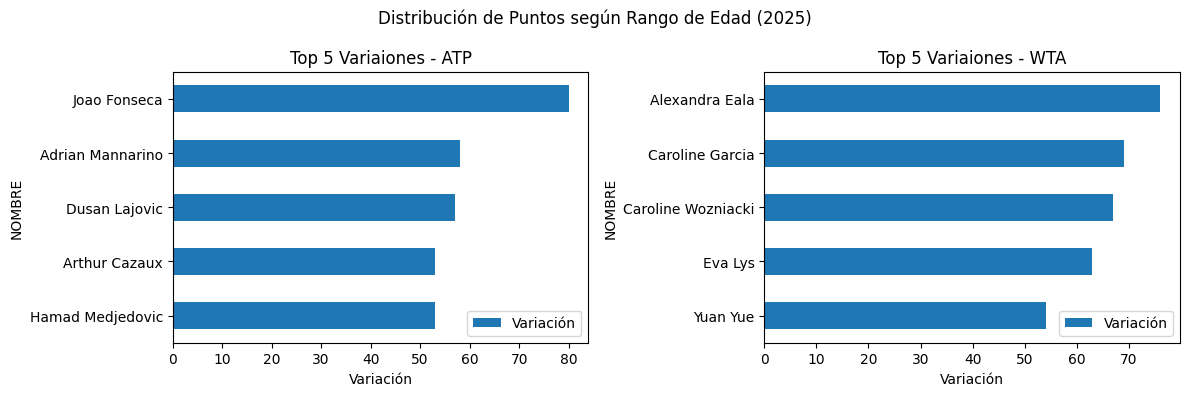

In [260]:
# Solución
# Gráficos por año

filtro_atp = df_dif['Categoría']=='ATP'
filtro_wta = df_dif['Categoría']=='WTA'

# Crear figura con dos subgráficos verticales
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico ATP
df_dif[filtro_atp].nlargest(5, columns=['Variación'])[::-1].plot(kind='barh',x='NOMBRE', y='Variación',ax=axes[0])
axes[0].set_title('Top 5 Variaiones - ATP')
axes[0].set_xlabel('Variación')


# Gráfico WTA
df_dif[filtro_wta].nlargest(5, columns=['Variación'])[::-1].plot(kind='barh',x='NOMBRE', y='Variación', title='WTA',ax=axes[1])
axes[1].set_title('Top 5 Variaiones - WTA')
axes[1].set_xlabel('Variación')

# Ajustes finales
fig.suptitle('Distribución de Puntos según Rango de Edad (2025)')
plt.tight_layout()
plt.show()

9. Grafique la cantidad de tenistas según rango de edad en 2025.

In [ ]:
# Tu código aquí

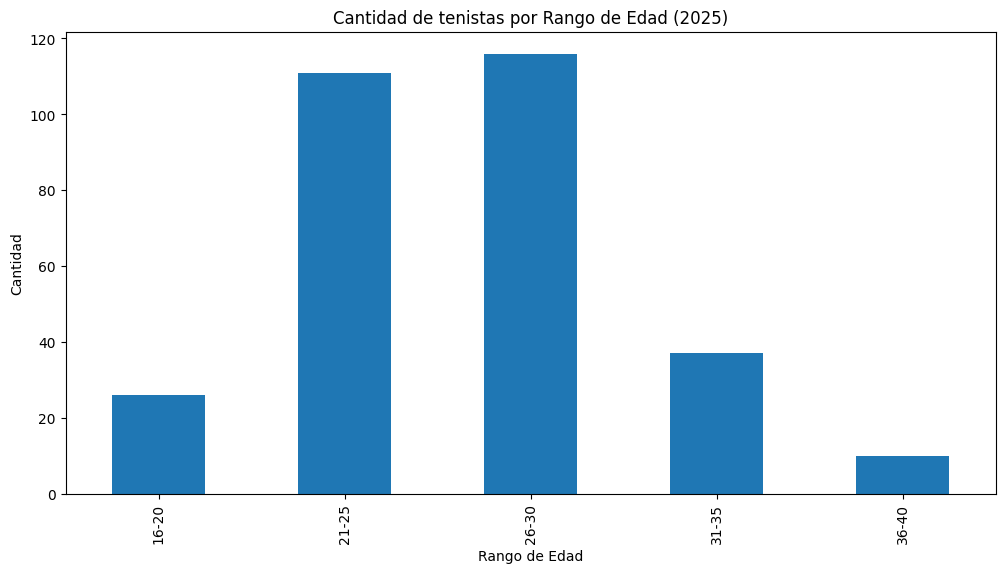

In [271]:
# Solución
df_2025 = df[df['Temporada'] == 2025]
plt.figure(figsize=(12,6))
plt.title('Cantidad de tenistas por Rango de Edad (2025)')
plt.ylabel('Cantidad')
df_2025['Rango de Edad'].value_counts().sort_index().plot(kind='bar')
plt.show()

10. Grafique la cantidad de tenistas según rango de edad y sexo en 2025.

In [ ]:
# Tu código aquí

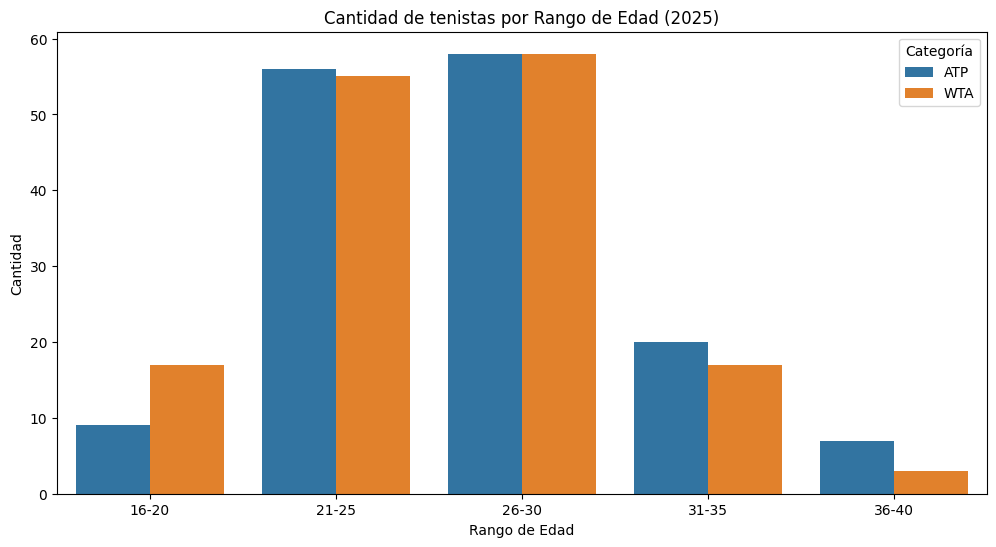

In [274]:
# Solución
plt.figure(figsize=(12,6))
plt.title('Cantidad de tenistas por Rango de Edad (2025)')
plt.ylabel('Cantidad')
sns.countplot(data=df_2025, x='Rango de Edad', hue='Categoría')
plt.show()

11. ¿Es conveniente usar gráfico de líneas en este conjunto de datos? Fundamente su respuesta.

In [ ]:
# Tu código aquí

__Solución__

Los gráficos de líneas son útiles para visualizar **evolución temporal**. En este conjunto, 
si analizamos evolución de ranking o puntos a través del tiempo, sí conviene. 
Para variables categóricas (como sexo o rango de edad), no es recomendable.


12. Filtre los datos para Nicolás Jarry, Alejandro Tabilo y Cristian Garín, y visualice su evolución en el ranking anualmente. Para ello, utilice un gráfico de líneas.

In [ ]:
# Tu código aquí

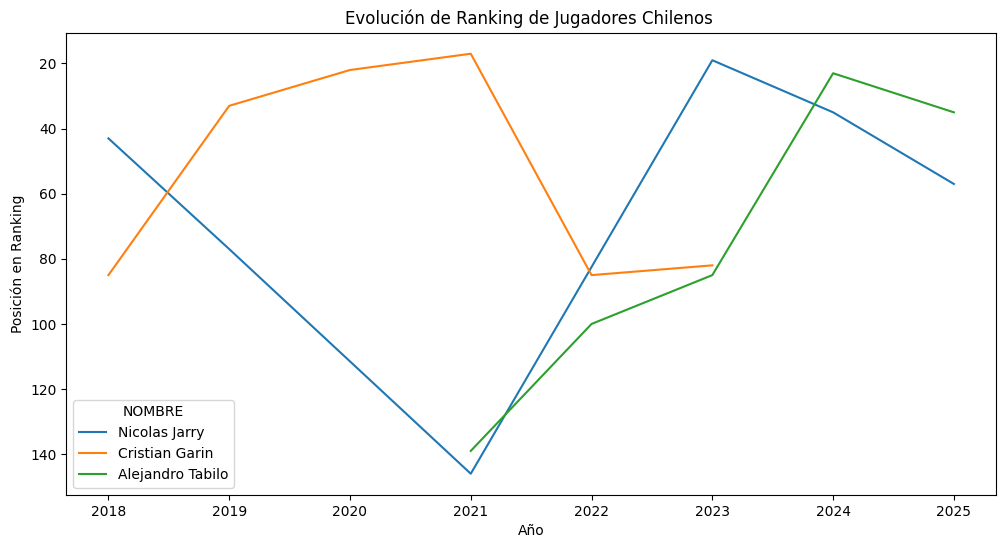

In [299]:
# Solución

# Filtro de jugadores
jugadores = ['Nicolas Jarry', 'Alejandro Tabilo', 'Cristian Garin']
df_chilenos = df[df['NOMBRE'].isin(jugadores)]

# Gráfico
plt.figure(figsize=(12,6))
plt.title('Evolución de Ranking de Jugadores Chilenos ')
sns.lineplot(data=df_chilenos, x='Temporada', y='POS', hue='NOMBRE')
plt.xlabel('Año')
plt.ylabel('Posición en Ranking')
plt.gca().invert_yaxis()  # En ranking, menor número es mejor